# BOSTON HOUSING

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [2]:

house_df = pd.read_csv('./datasets/housing.csv',sep='\s+', names= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
y_house_df = house_df.iloc[:,-1]
X_house_df = house_df.iloc[:,:-1]

# 1. LinearRegression

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_house_df, y_house_df, test_size=0.3, random_state=121)

lnr = LinearRegression()

lnr.fit(X_train, y_train)
pred = lnr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
accuracy = lnr.score(X_test, y_test)

print(f'MSE : {mse:.4f} RMSE : {rmse:.4f} ACCURACY : {accuracy:.4f}')

MSE : 29.3131 RMSE : 5.4142 ACCURACY : 0.6445


In [4]:
# # 그래프 그려보기

# for i in range(len(X_test.keys())):
    
#     plt.figure(figsize=(4,2), facecolor='w')
#     plt.xlabel(X_test.keys()[i], fontsize = 7)
#     plt.ylabel('MEDV', fontsize = 7)
#     plt.title(f'BOSTON HOUSING PRICE RW {X_test.keys()[i]}', fontsize = 10)
#     plt.scatter(X_test[X_test.keys()[i]], y_test, color ='r', label ='DATA')
#     plt.plot(X_test[X_test.keys()[i]], pred, color = 'blue', label = 'PRED')
#     plt.legend()

# 2. StandardScaler & LinearRegression

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X_house_df, y_house_df, test_size=0.3, random_state=121)
house_df = pd.read_csv('./datasets/housing.csv',sep='\s+', names= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
y_house_df = house_df['MEDV']
X_house_df = house_df.drop('MEDV', axis = 1)

scaler = StandardScaler()
scaler.fit(X_house_df)
X_house_df_scaled = scaler.transform(X_house_df)
X_house_df_scaled_df = pd.DataFrame(data=X_house_df_scaled, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
X_house_df_scaled_df['CHAS'] = X_house_df['CHAS']
# scaler.fit(y_house_df)
# y_house_df_scaled = scaler.transform(y_house_df)
# y_house_df_scaled_df = pd.DataFrame(data=y_house_df_scaled, columns='MEDV')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_house_df_scaled_df, y_house_df, test_size=0.3, random_state=121)

lnr = LinearRegression()

lnr.fit(X_train, y_train)
pred = lnr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
accuracy = lnr.score(X_test, y_test)

print(f'MSE : {mse:.4f} RMSE : {rmse:.4f} ACCURACY : {accuracy:.4f}')

MSE : 28.8432 RMSE : 5.3706 ACCURACY : 0.6458


# DT적용

In [7]:
y_house_df = y_house_df.astype({'MEDV' : 'int'}) # dt를 하기위해서는 target 값을 int로 바꿔 주어야한다.
X_train, X_test, y_train, y_test = train_test_split(X_house_df, y_house_df, test_size=0.3, random_state=121)

dt_clf = DecisionTreeClassifier(random_state=121)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=121)

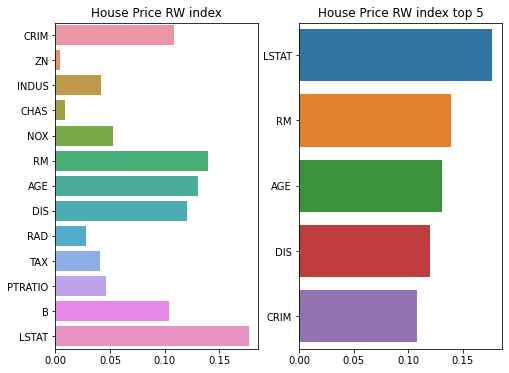

In [8]:
import seaborn as sns

# for name, value in zip(X_house_df.keys(), dt_clf.feature_importances_):
#     print(f'{name} : {value:.4f}')

# 중요도 순으로 정렬하고 상위5개만 뽑아내기
ftr_imp_values = dt_clf.feature_importances_
ftr_imp = pd.Series(ftr_imp_values, index=X_train.columns)
ftr_imp_top5 = ftr_imp.sort_values(ascending=False)[:5]

plt.figure(facecolor='w' , figsize=(8,6))

plt.subplot(1,2,1)
plt.title('House Price RW index')
sns.barplot(x=dt_clf.feature_importances_, y=X_house_df.keys())

plt.subplot(1,2,2)
plt.title('House Price RW index top 5')
sns.barplot(x=ftr_imp_top5, y= ftr_imp_top5.index)

plt.show()

In [9]:
X_house_df_top5 = X_house_df[['LSTAT', 'RM', 'AGE', 'DIS', 'CRIM']]

X_train, X_test, y_train, y_test = train_test_split(X_house_df_top5, y_house_df, test_size=0.3, random_state=121)

lnr = LinearRegression()

lnr.fit(X_train, y_train)
pred = lnr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
accuracy = lnr.score(X_test, y_test)

print(f'MSE : {mse:.4f} RMSE : {rmse:.4f} ACCURACY : {accuracy:.4f}')

MSE : 31.7199 RMSE : 5.6320 ACCURACY : 0.6153


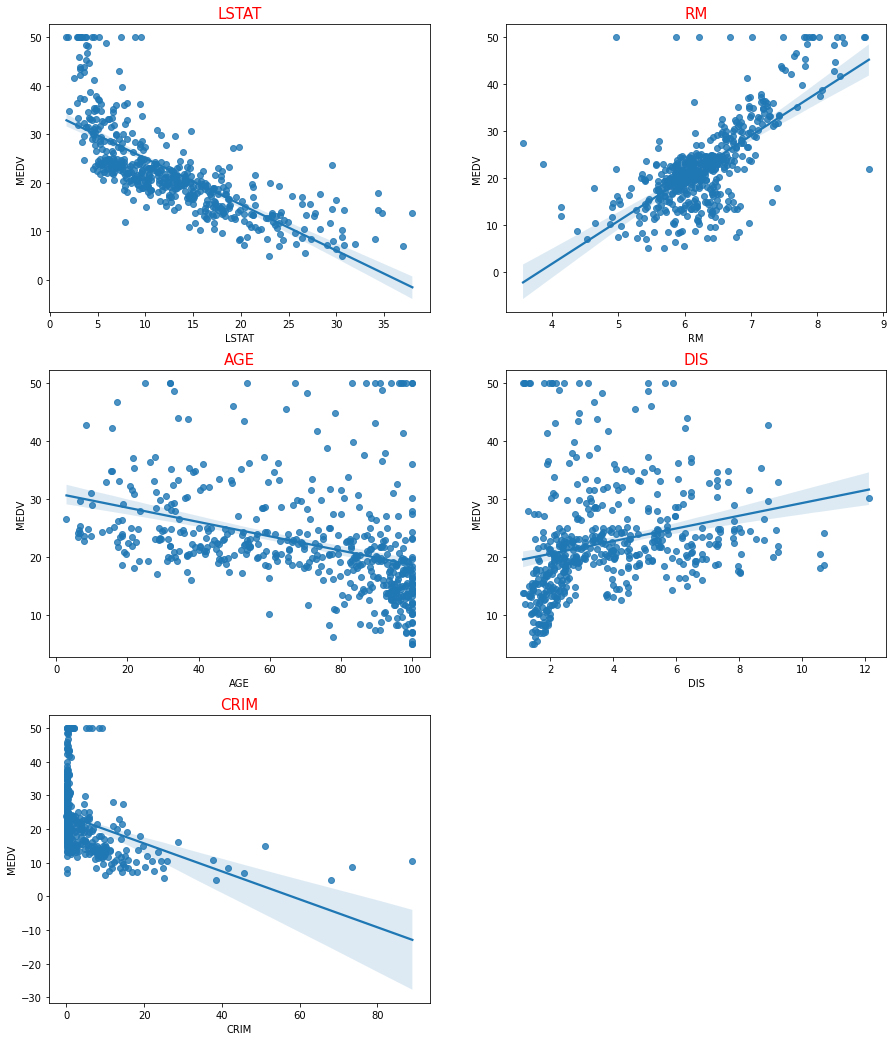

In [32]:
# ['LSTAT', 'RM', 'AGE', 'DIS', 'CRIM'] 와 MEDV 의 상관 관계 그래프 그려보기

plt.figure(figsize=(15,18), facecolor='w')

features = ['LSTAT', 'RM', 'AGE', 'DIS', 'CRIM']
target = house_df['MEDV']

for i, col in enumerate(features):
    plt.subplot(3, 2, i+1)
    x = X_house_df_top5[col]
    y = target
    sns.regplot(x, y, data=X_house_df_top5)
    plt.title(col, fontsize = 15, color = 'r')
    plt.xlabel(col)
    plt.ylabel('MEDV')

# DT적용 + SCALING

In [11]:
y_house_df = y_house_df.astype({'MEDV' : 'int'}) # dt를 하기위해서는 target 값을 int로 바꿔 주어야한다.
X_train, X_test, y_train, y_test = train_test_split(X_house_df, y_house_df, test_size=0.3, random_state=121)

dt_clf = DecisionTreeClassifier(random_state=121)

dt_clf.fit(X_train, y_train)

# 중요도 순으로 정렬하고 상위5개만 뽑아내기
ftr_imp_values = dt_clf.feature_importances_
ftr_imp = pd.Series(ftr_imp_values, index=X_train.columns)
ftr_imp_top5 = ftr_imp.sort_values(ascending=False)[:5]

In [12]:
X_house_df_top5 = X_house_df[['LSTAT', 'RM', 'AGE', 'DIS', 'CRIM']]

# StandardScaler() 하기
scaler = StandardScaler()
scaler.fit(X_house_df_top5)
X_house_df_scaled = scaler.transform(X_house_df_top5)
X_house_df_scaled_df = pd.DataFrame(data=X_house_df_scaled, columns=['LSTAT', 'RM', 'AGE', 'DIS', 'CRIM'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_house_df_scaled_df, y_house_df, test_size=0.3, random_state=121)

lnr = LinearRegression()

lnr.fit(X_train, y_train)
pred = lnr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
accuracy = lnr.score(X_test, y_test)

print(f'MSE : {mse:.4f} RMSE : {rmse:.4f} ACCURACY : {accuracy:.4f}')

MSE : 31.7199 RMSE : 5.6320 ACCURACY : 0.6153


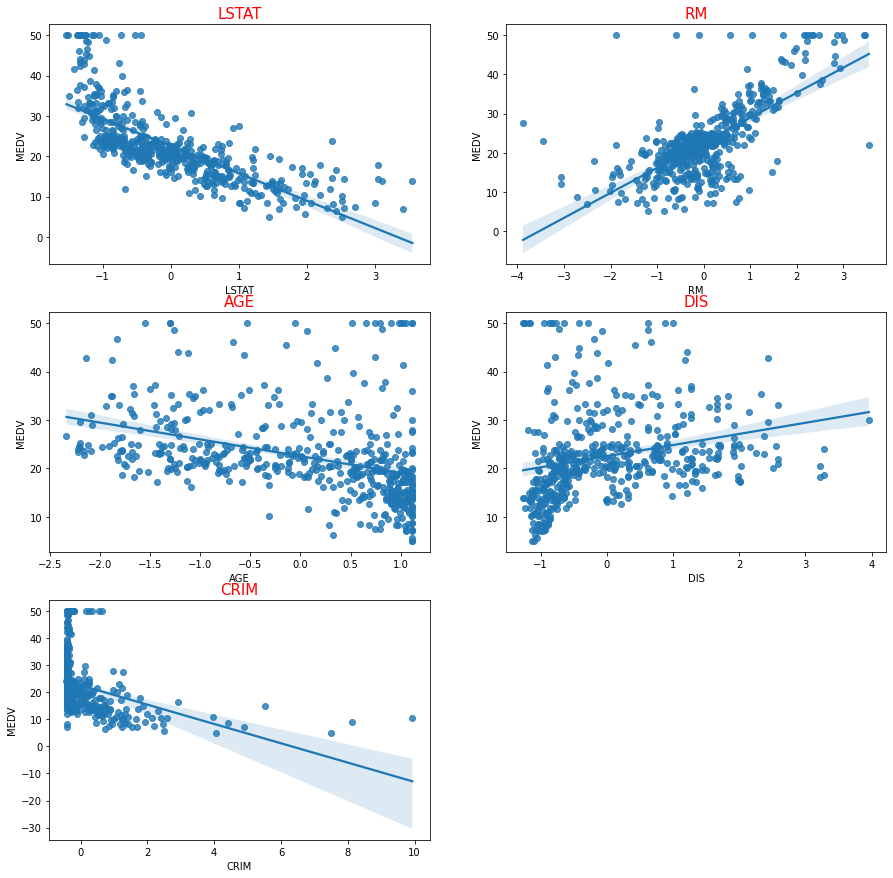

In [33]:
plt.figure(figsize=(15,15), facecolor='w')

features = ['LSTAT', 'RM', 'AGE', 'DIS', 'CRIM']
target = house_df['MEDV']

for i, col in enumerate(features):
    plt.subplot(3, 2, i+1)
    x = X_house_df_scaled_df[col]
    y = target
    sns.regplot(x, y, data=X_house_df_top5)
    plt.title(col, fontsize = 15, color = 'r')
    plt.xlabel(col)
    plt.ylabel('MEDV')